# 특성 공학과 규제 (농어 무게 예측하기)

> 농어의 길이, 높이, 두께를 이용해서 무게(숫자)를 예측하는 문제

* 무게는 숫자이므로 이 문제는 회귀(Regression)문제이다.
* 사용한 모델 : 다중 회귀, 릿지 회귀, 라쏘 회귀

이전 장에서는 농어의 길이 특성만 이용해서 선형 회귀 모델을 학습하여 농어의 무게를 예측했다.

하지만 선형 회귀는 특성의 수가 많을 수록 강력한 성능을 발휘한다.

이번 장에서는 농어의 길이, 높이, 두께 특성들을 이용해서 농어의 무게를 예측하는 다중 회귀 모델에 대해서 알아보고, 특성들을 조합해서 새로운 특성을 만들어내는 특성 공학에 대해서 알아본다.

또한 선형 회귀 모델의 과대적합을 해소하는 규제에 대해서 알아보고, 대표적인 선형 회귀 규제 모델인 릿지 회귀 모델과 라쏘 회귀 모델에 대해서 알아본다.

## 다중 회귀

### 데이터 준비

> 판다스 (pandas)를 이용해서 인터넷에서 데이터를 바로 내려받아 사용

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [79]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [80]:
from sklearn.model_selection import train_test_split    

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 3) (42,)
(14, 3) (14,)


### 특성 공학 (feature engineering)

> 특성 공학 : 기존의 특성에서 새로운 특성을 만들어내는 작업

사이킷런에서는 '변환기(transformer)'라고 불리는 특성을 만들거나 전처리하는 클래스가 존재한다.

특성을 제곱해서 추가하거나 특성들끼리 곱해서 새로운 특성을 추가하는 작업을 수행할 수 있다.

In [81]:
from sklearn.preprocessing import PolynomialFeatures

# 선형 방정식의 절편은 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.
# 값이 1인 특성을 포함하지 않기 위해서 include_bias=False 매개변수를 지정
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly_input = poly.transform(train_input)

print(train_poly_input.shape)

(42, 9)


In [82]:
# 9개의 특성이 어떻게 만들어졌는지 확인
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [83]:
# 테스트 세트를 변환
# 훈련 세트를 기준으로 테스트 세트를 변환하는 것이 좋다.
test_poly_input = poly.transform(test_input)

print(train_poly_input.shape, train_target.shape)
print(test_poly_input.shape, test_target.shape)

(42, 9) (42,)
(14, 9) (14,)


### 모델 생성 및 검증

> 다중 회귀 모델 생성

농어의 길이, 높이, 두께 특성과 각 특성들을 제곱하고 서로 곱한 특성들을 이용해서 선형 회귀를 수행한다.

* 훈련 세트 점수 : 0.9903183436982125
* 테스트 세트 점수 : 0.9714559911594159

이전 장에서 하나의 특성값인 길이와 길이를 제곱한 특성을 추가해서 다항 회귀를 수행했을때는 과소적합 문제가 발생했었다.

그리고 이번에는 다양한 특성들을 이용해서 다중 회귀를 수행했고, 훈련 세트 점수가 테스트 세트 점수보다 높고 둘의 차이가 과도하게 크지도 않으며 좋은 점수를 나타내므로 과소적합 문제를 해결한 것을 볼 수 있다.

---

추가적으로 특성의 최고차항의 차수를 5로 지정하여 매우 많은 특성을 생성해서 다중 회귀 모델을 학습한 결과를 관찰했다.

학습 결과는 다음과 같다

* 훈련 세트 점수 : 0.999999999999769
* 테스트 세트 점수 : -144.40490595353674

훈련 세트에 대해서는 완벽에 가까운 점수를 출력했지만, 테스트 세트 점수는 -144라는 말도 안되는 점수를 출력한 것을 볼 수 있다.

선형 회귀 모델은 특성의 개수가 많으면 아주 강력한 성능을 내지만, 특성의 개수가 너무 많으면 모델이 너무 과대적합 되므로 테스트 세트에 대해서는 말도 안되는 성능을 보이게 된다.

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly_input, train_target)

print(lr.score(train_poly_input, train_target))
print(lr.score(test_poly_input, test_target))

0.9903183436982125
0.9714559911594159


In [85]:
# degree 매개변수를 사용해서 고차항의 최대 차수를 지정할 수 있다.
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)

train_poly_input = poly.transform(train_input)
test_poly_input = poly.transform(test_input)

print(train_poly_input.shape)
print(test_poly_input.shape)

(42, 55)
(14, 55)


In [86]:
# 특성이 55개인 훈련 세트를 이용해서 선형 회귀를 수행
lr.fit(train_poly_input, train_target)

print(lr.score(train_poly_input, train_target))
print(lr.score(test_poly_input, test_target))

0.999999999999769
-144.40490595353674


## 규제 (regularization)

> 규제 : 모델의 과대적합을 해결하기위한 방법

모델의 과대적합을 해소하기 위해서 모델에 규제를 가할 수 있다.

선형 회귀 모델의 경우 규제를 가한다는 것은 각 특성에 곱해지는 계수의 값을 작게 만드는 것이다.

모델에 규제를 가하기 전에 각 특성들의 스케일을 정규화해야 한다.

그 이유는 각 특성들의 스케일이 정규화되지 않으면, 각 특성들에 곱해지는 계수들의 값들도 서로 다를 것이고, 그렇게 된다면 각 특성들에 가해지는 규제들이 공정하게 제어되지 않기 때문이다.

선형 회귀 모델에 규제를 추가한 대표적인 모델은 '릿지(Ridge)' 모델과 '라쏘(Lasso)' 모델이 있다.

두 모델 전부 특성에 곱해지는 계수의 값을 줄이는 규제를 적용했다. 차이점은 다음과 같다.

* 릿지 모델 : 계수를 제곱한 값을 기준으로 규제를 적용
* 라쏘 모델 : 계수의 절댓값을 기준으로 규제를 적용, 계수를 아예 0으로 만들 수도 있다.

In [87]:
# 선형 회귀 모델에 규제를 가하기 전에 특성들의 스케일을 정규화해야 한다.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly_input)

train_scaled_input = ss.transform(train_poly_input)
test_scaled_input = ss.transform(test_poly_input)

print(train_scaled_input.shape)
print(test_scaled_input.shape)

# 훈련 세트에서 학습한 각 특성들의 평균과 표준편차를 확인하는 방법
# 55개의 특성이 있으므로 55개의 평균과 표준편차들이 존재한다.

# print(ss.mean_, ss.scale_)

(42, 55)
(14, 55)


## 릿지 회귀

선형 회귀 모델에 규제를 가한 모델인 릿지 회귀 모델을 사용할 수 있다.

릿지 회귀 모델에는 규제의 강도를 alpha 매개변수를 사용해서 설정할 수 있다.

alpha값이 커지면, 규제의 강도가 강해지고, 계수의 크기가 작아지기 때문에 더 과소적합시킬 수 있다.

반대로 alpha값이 작아지면, 규제의 강도가 약해지고, 계수의 크기가 덜 작아지기 때문에 과대적합 될 수 있다.

따라서 최적의 alpha값을 찾아서 설정해주는 것이 중요하다.

릿지 회귀 모델의 alpha값과 같은 매개변수를 '하이퍼 파라미터(hyperparameter)'라고 한다.

> 하이퍼 파라미터 : 모델이 직접 학습할 수 없고 사람이 직접 설정해주어야 하는 파라미터

아래 예에서 0.001부터 100까지 alpha 값을 10배 단위로 지정해서 훈련 세트와 테스트 세트에 대한 결정계수 값을 각각 구하고 그래프를 그려보면서 최적의 alpha 하이퍼 파라미터 값을 찾아본다.

In [88]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled_input, train_target)

print(ridge.score(train_scaled_input, train_target))
print(ridge.score(test_scaled_input, test_target))

0.9896101671037343
0.9790693977615388


In [89]:
# alpha 값에 대한 결정계수 값을 그래프를 통해 그려보면서 최적은 alpha 하이퍼 파라미터 값을 찾는 과정
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled_input, train_target)

    # 훈련 세트에 대한 결정계수 값 저장
    train_score.append(ridge.score(train_scaled_input, train_target))

    # 테스트 세트에 대한 결정계수 값 저장
    test_score.append(ridge.score(test_scaled_input, test_target))

print(train_score)
print(test_score)

[0.9930455252088416, 0.9917809981250488, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961502774, 0.9800187936871717, 0.9827976465386955, 0.9790693977615388, 0.9725329582461568, 0.9627042641050291]


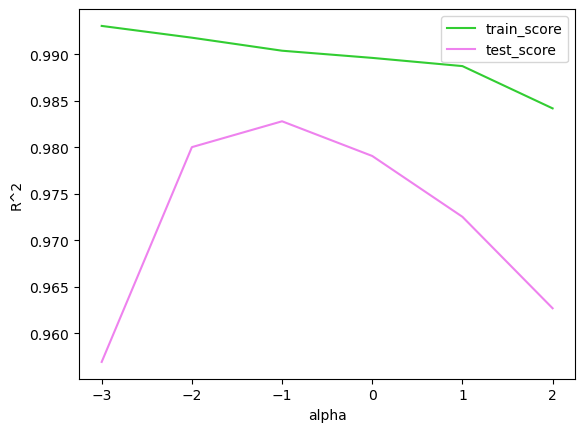

In [90]:
# x축 값인 alpha 값을 10배씩 했기 때문에 로그를 취해준다.
plt.plot(np.log10(alpha_list), train_score, color="limegreen", label="train_score")
plt.plot(np.log10(alpha_list), test_score, color="violet", label="test_score")

plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend(loc="upper right")

plt.show()

In [91]:
# 훈련 세트 점수와 테스트 세트 점수가 가장 가깝고 테스트 세트 점수가 가장 높은 -1, 즉 alpha=0.1이 최적의 하이퍼 파라미터 값이다.
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled_input, train_target)

print(ridge.score(train_scaled_input, train_target))
print(ridge.score(test_scaled_input, test_target))

0.9903815817570366
0.9827976465386955


## 라쏘 회귀

릿지 회귀 모델과 마찬가지로 라쏘 회귀 모델도 alpha 하이퍼 파라미터 값을 통해서 규제 강도를 설정할 수 있다.

사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행한다.

마찬가지로 0.001부터 100까지 alpha 값을 10배 단위로 지정해서 훈련 세트와 테스트 세트에 대한 결정계수 값을 각각 구하고 그래프를 그려보면서 최적의 alpha 하이퍼 파라미터 값을 찾아본다.

추가적으로 라쏘 회귀 모델은 특성에 대한 계수 값을 0으로 만들 수 있다.

아래의 예에서 라쏘 회귀 모델이 0으로 만든 계수의 개수는 40인 것을 확인할 수 있다.

총 55개의 특성 중에서 15개의 특성만 유용한 특성이라고 판단한 것이다.

이런 특징으로 라쏘 회귀 모델은 유용한 특성을 골라내는 용도로도 사용할 수 있다는 것을 알 수 있다.

In [92]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled_input, train_target)

print(lasso.score(train_scaled_input, train_target))
print(lasso.score(test_scaled_input, test_target))

0.989789897208096
0.9800593698421884


In [93]:
# alpha 값에 대한 결정계수 값을 그래프를 통해 그려보면서 최적은 alpha 하이퍼 파라미터 값을 찾는 과정
# ConvergenceWarning 경고는 지정한 반복 횟수가 부족할 때 발생하는 경고이다.
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled_input, train_target)

    # 훈련 세트 점수를 저장
    train_score.append(lasso.score(train_scaled_input, train_target))
    # 테스트 세트 점수를 저장
    test_score.append(lasso.score(test_scaled_input, test_target))

print(train_score)
print(test_score)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600283, 0.9898116789062786, 0.9887624603020236, 0.9078618674946647]
[0.9731817502723561, 0.9761545611184592, 0.9824382983968608, 0.9801844137326114, 0.9830309645308442, 0.9090772073024515]


/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


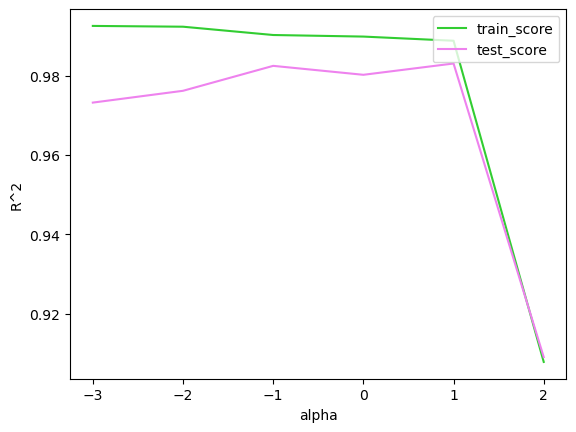

In [94]:
# x축 값인 alpha 값을 10배씩 했기 때문에 로그를 취해준다.
plt.plot(np.log10(alpha_list), train_score, color="limegreen", label="train_score")
plt.plot(np.log10(alpha_list), test_score, color="violet", label="test_score")

plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend(loc="upper right")
plt.show()

In [95]:
# 훈련 세트 점수와 테스트 세트 점수가 가장 가깝고 테스트 세트 점수가 가장 높은 1, 즉 alpha=10이 최적의 하이퍼 파라미터 값이다.
lasso = Lasso(alpha=10)
lasso.fit(train_scaled_input, train_target) 

print(lasso.score(train_scaled_input, train_target))
print(lasso.score(test_scaled_input, test_target))

0.9888067471131867
0.9824470598706695


In [96]:
# 라쏘 모델이 0으로 만든 계수의 개수
print(np.sum(lasso.coef_ == 0))

40
